In [1]:
import os
import pandas as pd
import glob
from tqdm import tqdm
from scipy.io import wavfile
from scipy import signal
import numpy as np
import soundfile as sf
os.chdir('../src/')
import config
import matplotlib.pyplot as plt

In [2]:
with open(config.DATA_FOLDER +'train/validation_list.txt', 'r') as fin:
    validation_files = fin.readlines()
with open(config.DATA_FOLDER +'train/validation_list.txt', 'r') as fin:
    validation_files = fin.readlines()

In [3]:
all_train_files = glob.glob(config.DATA_FOLDER + 'train/audio/*/*wav')
all_test_files = glob.glob(config.DATA_FOLDER + 'test/audio/*wav')

In [3]:
all_files_list = []
for file_name in tqdm(all_train_files):
    dict_ = {'label' : file_name.split('/')[-2],
     'relative_path' : file_name.split('/')[-2] + '/' + file_name.split('/')[-1],
     'full_path' : file_name}
    all_files_list.append(dict_)
df = pd.DataFrame(all_files_list)
df = df[df['label']!= '_background_noise_']

100%|██████████| 64727/64727 [00:00<00:00, 317279.95it/s]


In [48]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False
                                       )
    return freqs, np.log(spec.T.astype(np.float32) + eps)

def read_wav(img_path):
    sample_rate, audio  = wavfile.read(img_path)
    res = log_specgram(audio, sample_rate)
    return res

In [ ]:
img_max_list = []
img_min_list = []

for file_path in tqdm(all_train_files):
    _, img = read_wav(file_path)
    
    img_min_list.append(img.min())
    img_max_list.append(img.max())

 79%|███████▉  | 51160/64727 [07:10<00:44, 306.70it/s]

In [ ]:
test_img_max_list = []
test_img_min_list = []

for file_path in tqdm(all_test_files):
    _, img = read_wav(file_path)
    
    test_img_min_list.append(img.min())
    test_img_max_list.append(img.max())

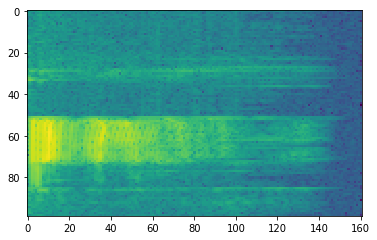

In [47]:
plt.imshow(img)
plt.show()

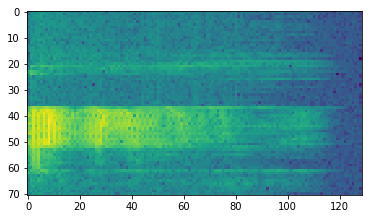

In [44]:
plt.imshow(img)
plt.show()